In [2]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
import matplotlib.pyplot as plt # 데이터 시각화

from datetime import datetime, timedelta # 시간 데이터 처리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
%matplotlib inline

In [3]:
test = pd.read_csv("D:/workspace/DACON_CONTEST_2019/DACON_DATASET/test.csv")
submission = pd.read_csv("D:/workspace/DACON_CONTEST_2019/DACON_DATASET/submission_1002.csv")

test['Time'] = pd.to_datetime(test['Time']) 
test = test.set_index('Time')

FileNotFoundError: [Errno 2] File b'D:/workspace/DACON_CONTEST_2019/DACON_DATASET/test.csv' does not exist: b'D:/workspace/DACON_CONTEST_2019/DACON_DATASET/test.csv'

In [9]:
test

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
2017-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2017-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
2017-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
2017-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN
2017-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251,0.021,NaN
2017-07-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239,0.021,NaN
2017-07-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,0.020,NaN
2017-07-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176,0.021,NaN


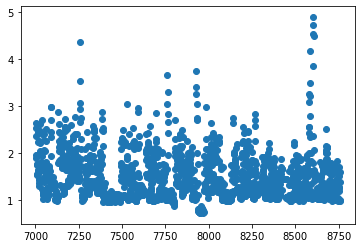

In [52]:
plt.scatter(list(range(0, len(test['X26']))), test['X26'])
plt.show()

In [54]:
import seaborn as sns

In [81]:
test.T.index

Index(['X26', 'X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326',
       'X299',
       ...
       'X283', 'X329', 'X223', 'X266', 'X20', 'X443', 'X347', 'X75', 'X107',
       'X230'],
      dtype='object', length=200)

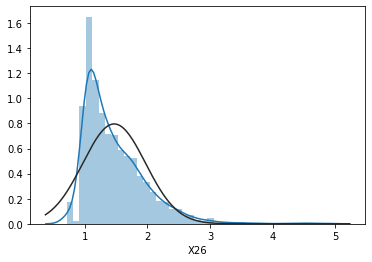

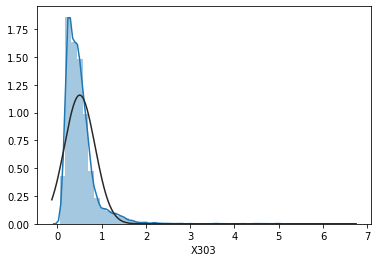

In [90]:
sns.distplot(test.X26.dropna(), fit=norm)
plt.show()
sns.distplot(test.X303.dropna(), fit=norm)
plt.show()

In [86]:
test.X26

Time
2017-07-01 00:00:00      NaN
2017-07-01 01:00:00      NaN
2017-07-01 02:00:00      NaN
2017-07-01 03:00:00      NaN
2017-07-01 04:00:00      NaN
                       ...  
2018-06-30 19:00:00    1.255
2018-06-30 20:00:00    1.596
2018-06-30 21:00:00    1.379
2018-06-30 22:00:00    1.000
2018-06-30 23:00:00    0.976
Name: X26, Length: 8760, dtype: float64

In [96]:
scipy.stats.normaltest(test.X26.dropna(), axis=0)

NormaltestResult(statistic=676.5795299648307, pvalue=1.209544312829533e-147)

In [1]:
scipy.stats.normaltest(test.dropna().X26, axis=0)

NameError: name 'scipy' is not defined

In [97]:
stats.describe(test.X26.dropna())

DescribeResult(nobs=1757, minmax=(0.7120000000000001, 4.895), mean=1.4720142287990892, variance=0.25113660173364466, skewness=1.782389083699209, kurtosis=5.58811745161079)